## 什么是变量

本节代码包括：
- 从 csv 获取数据
- 查看数据集
- 查看数据基本描述信息
- 查看变量的类型
- 查看数据集形状
- 数值型变量（unique取值/直方图）
- 类别型变量（unique取值/直方图）

使用的数据集是著名的 Lending Club 在 Kaggle上的数据集，下载地址 [Kaggle's website](https://www.kaggle.com/wendykan/lending-club-loan-data)。

由于原始 CSV 过大，暂时不上传到仓库里了。请将下载好的 loan.zip 文件解压，放置在 /data 目录下。

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### 从csv中获取数据

In [5]:
# 从csv中读取数据文件
# 由于原始数据集特征过多，这里定义下要取的列
use_cols = [
    'loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status',
    'open_il_12m'
]

# 读取csv数据，抽样10000行。 注意读取文件的路径！
data = pd.read_csv('../data/loan.csv', usecols=use_cols).sample(10000, random_state=44)  # set a seed for reproducibility

# 输出数据集的前 5 行
data.head(n=5)

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m
131079,23675.0,15.80,90000.0,Current,4.0,NaN
384935,7500.0,11.67,102000.0,Current,11.0,NaN
73585,11150.0,9.25,72000.0,Fully Paid,6.0,NaN
660814,8000.0,6.24,101400.0,Current,20.0,NaN
349757,34000.0,19.52,99000.0,Current,12.0,NaN


### 单变量分析（数值变量）
- 计数/均值/标准差/最小/最大/百分位值

In [6]:
# 输出各个变量的基本描述信息
data.describe()

,loan_amnt,int_rate,annual_inc,open_acc,open_il_12m
count,10000.000000,10000.000000,1.000000e+04,10000.000000,238.000000
mean,14790.425000,13.280309,7.503549e+04,11.502900,0.777311
std,8416.797502,4.394824,5.557621e+04,5.340135,0.943996
min,1000.000000,5.320000,0.000000e+00,1.000000,0.000000
25%,8000.000000,9.990000,4.500000e+04,8.000000,0.000000
50%,13000.000000,12.990000,6.400000e+04,11.000000,1.000000
75%,20000.000000,16.290000,9.000000e+04,14.000000,1.000000
max,35000.000000,27.880000,2.300000e+06,48.000000,6.000000


In [7]:
# 输出各个变量的类型。 注意这里 loan_status 的类型是object，所以无法输出描述信息
data.dtypes

loan_amnt      float64
int_rate       float64
annual_inc     float64
loan_status     object
open_acc       float64
open_il_12m    float64
dtype: object

In [12]:
# 数据集的形状
data.shape

(10000, 6)

### 去重后的取值

In [13]:
# 贷款金额的取值（去重）
data.loan_amnt.unique()

array([ 23675.,   7500.,  11150.,   8000.,  34000.,   8725.,  30000.,
        10000.,  10200.,  18000.,  24000.,  12000.,  19200.,  35000.,
         4800.,  16800.,  14725.,  16000.,  31500.,  22500.,  18800.,
        14100.,  20000.,   5000.,  10625.,  13350.,  15000.,   2900.,
        28000.,  15950.,   1500.,   1000.,  25000.,  19500.,  13000.,
        21000.,  17650.,   9600.,  14525.,   5600.,   6400.,   6000.,
        14000.,  11000.,  22400.,  16825.,   8200.,  21600.,  20675.,
         2000.,   3950.,   4000.,   9500.,   8975.,  13625.,   7000.,
         5500.,   9450.,  10800.,   7200.,  27700.,   4650.,   3600.,
         6450.,  15625.,   4825.,  11200.,   4200.,  28500.,   3375.,
         5800.,   4425.,  25875.,  24800.,  14400.,  22000.,  19750.,
        26500.,   3625.,  17000.,  21125.,   7525.,   3000.,   9250.,
        14675.,  11700.,   7025.,  19775.,  17800.,  10300.,  13200.,
        32000.,  15400.,  10575.,   9000.,  10075.,  14600.,  11550.,
        12500.,  209

### 直方图

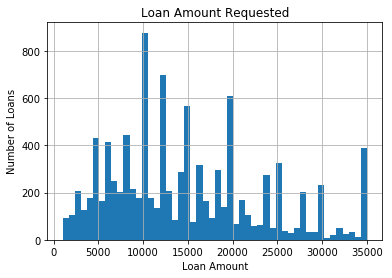

In [14]:
fig = data.loan_amnt.hist(bins=50)
fig.set_title('Loan Amount Requested')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

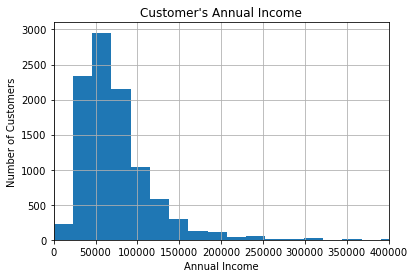

In [15]:
# 年收入的直方图
fig = data.annual_inc.hist(bins=100)
fig.set_xlim(0, 400000)
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

In [16]:
# 再来看一个离散型数值变量，开户数目
data.open_acc.dropna().unique()

array([  4.,  11.,   6.,  20.,  12.,   5.,   8.,   9.,  18.,  16.,  10.,
        13.,  14.,   7.,  19.,   3.,  15.,  17.,  26.,   2.,  27.,  22.,
        21.,  25.,  23.,  29.,  39.,  24.,  30.,  31.,  28.,  37.,  32.,
        48.,  33.,  34.,   1.,  35.,  36.,  41.,  45.,  40.,  42.])

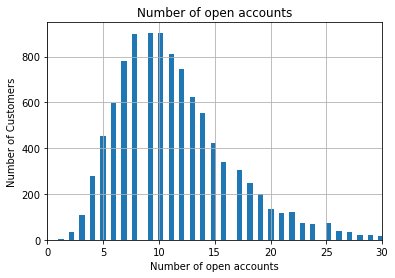

In [17]:
# 直方图
fig = data.open_acc.hist(bins=100)
fig.set_xlim(0, 30)
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

### 单变量分析（类别变量）

In [20]:
# 从csv中读取数据文件
# 由于原始数据集特征过多，这里定义下要取的列
use_cols = ['id', 'purpose', 'loan_status', 'home_ownership']

# 读取csv数据，抽样10000行
data = pd.read_csv('../data/loan.csv', usecols=use_cols).sample(10000, random_state=44)  # set a seed for reproducibility

# 输出数据集的前 5 行
data.head(n=5)

,id,home_ownership,loan_status,purpose
131079,5554979,RENT,Current,debt_consolidation
384935,16552323,OWN,Current,car
73585,8185454,RENT,Fully Paid,credit_card
660814,56180166,RENT,Current,debt_consolidation
349757,16772363,RENT,Current,credit_card


In [23]:
# 房屋所有权的频数分布
data['home_ownership'].value_counts()

MORTGAGE    4957
RENT        4055
OWN          986
OTHER          2
Name: home_ownership, dtype: int64

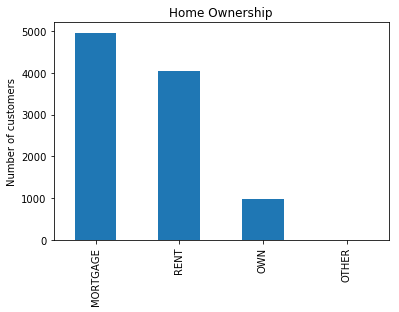

In [24]:
# 频数分布直方图
fig = data['home_ownership'].value_counts().plot.bar()
fig.set_title('Home Ownership')
fig.set_ylabel('Number of customers')

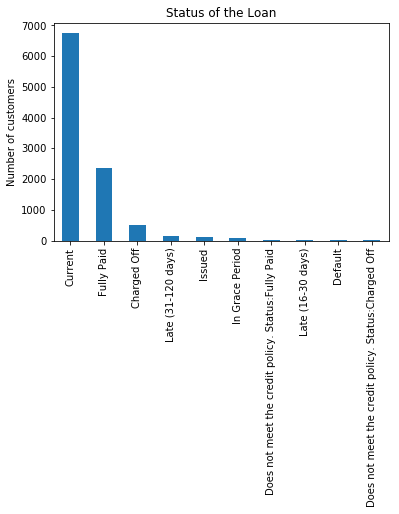

In [25]:
# 贷款状态
fig = data['loan_status'].value_counts().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')